In [39]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime
from scipy.stats import linregress

### Generate Random Coordinates of World Cities

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])
# for lat, lon in coordinates:
#     print(lat, lon)

77.6679389475652 128.60443206870445
-31.46956342321237 -3.9997296034138685
85.34957608204462 40.84267362146943
22.097584211579246 -114.92980771471508
59.47253266338396 -152.58717830511605
-20.367308787628986 -78.05490239510779
-7.277860358537623 122.29845364979252
-57.66901375417688 -81.34597750107885
-65.30346112829102 168.40005127928362
-32.548949308780166 148.2181064052009
54.73126876666953 29.924083634010742
57.86670989371598 -168.32300389256972
-24.628324352622556 -100.19112945944902
-38.31881428884516 125.99593539746076
38.55907506452246 73.32739224991542
-76.95718650789364 -35.1254626420498
-7.664749508109011 -115.18959888907705
4.407406461995194 -36.499458007486965
19.02690556230661 87.09487273052554
30.33598912054498 -149.31244350291323
-39.93945671593183 -136.81749590019953
39.92064983860871 121.19243572752976
-70.72347442217333 56.94204099044978
-31.319208096069616 67.96566191503007
44.816478221522885 103.09999079990718
75.66470657355177 172.7726366000668
-55.238720306803465

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count. (Above 500)
len(cities)

602

### Retrieve, Collect, and Clean Weather Data

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 93.38,
  'feels_like': 100.29,
  'temp_min': 88.16,
  'temp_max': 98.8,
  'pressure': 1019,
  'humidity': 48},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 0, 'gust': 0},
 'clouds': {'all': 100},
 'dt': 1659722365,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1659692451,
  'sunset': 1659743976},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Get the JSON data.
boston_data = city_weather.json()

In [12]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 98.8 48 100 5.01


In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-08-05 17:59:25'

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | jamestown
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | tumannyy
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | constitucion
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | homer
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | marcona
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | maumere
-----------------------------
Data Retrieval Complete      
-------

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,40.82,95,83,3.96,RU,2022-08-05 18:01:26
1,Jamestown,42.0970,-79.2353,86.52,60,40,5.75,US,2022-08-05 17:56:53
2,Constitucion,-35.3333,-72.4167,56.41,72,100,3.24,CL,2022-08-05 18:01:27
3,Homer,59.6425,-151.5483,53.49,95,100,11.01,US,2022-08-05 18:01:27
4,Maumere,-8.6199,122.2111,73.22,75,49,7.52,ID,2022-08-05 18:01:28


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2022-08-05 18:01:26,71.6872,128.8694,40.82,95,83,3.96
1,Jamestown,US,2022-08-05 17:56:53,42.0970,-79.2353,86.52,60,40,5.75
2,Constitucion,CL,2022-08-05 18:01:27,-35.3333,-72.4167,56.41,72,100,3.24
3,Homer,US,2022-08-05 18:01:27,59.6425,-151.5483,53.49,95,100,11.01
4,Maumere,ID,2022-08-05 18:01:28,-8.6199,122.2111,73.22,75,49,7.52


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Plot Weather Data

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Get today's date in seconds.
today = time.time()
today = time.strftime("%x")
today

'08/05/22'

#### Latitude vs Max Temperature

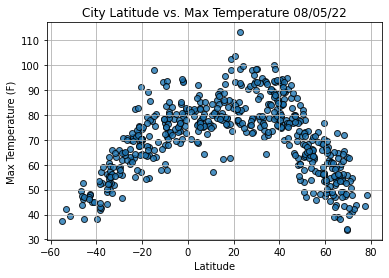

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

#### Latitutde vs Humidity

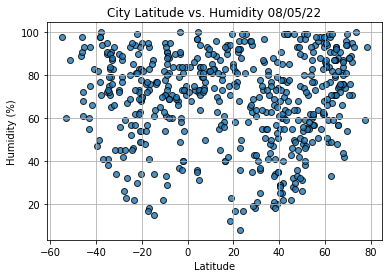

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

#### Latitutde vs Cloudiness

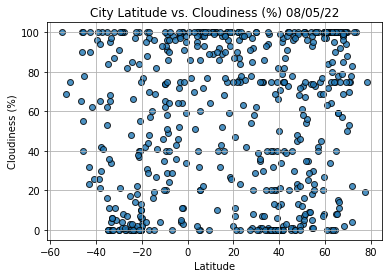

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

#### Latitutde vs Wind Speed

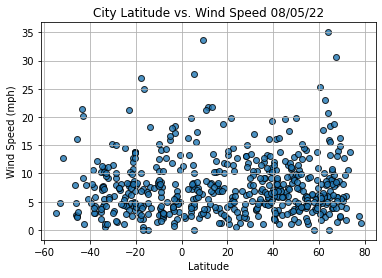

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

### Determine Correlations

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

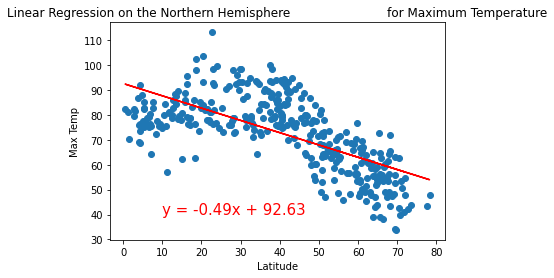

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

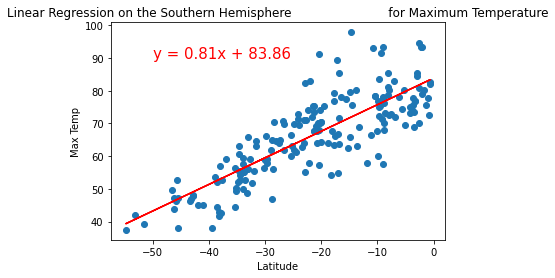

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

##### Findings
The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. When we are further from the equator the temperatures become cooler.

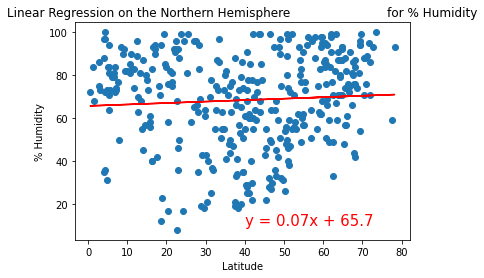

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

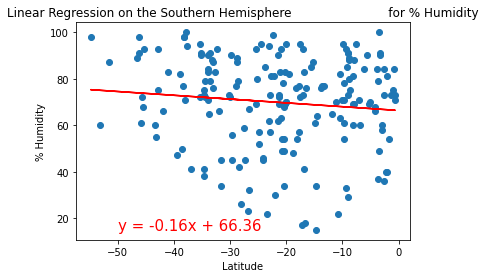

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

##### Findings
The correlation between latitude and percent humidity is very low because the r-value is close to 0 for both the Northern and Southern Hemispheres.
This means that percent humidity is unpredictable due to changing weather pattersn that can increase or decrease percent humidity,

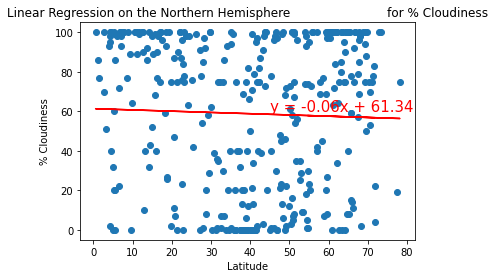

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(45,60))

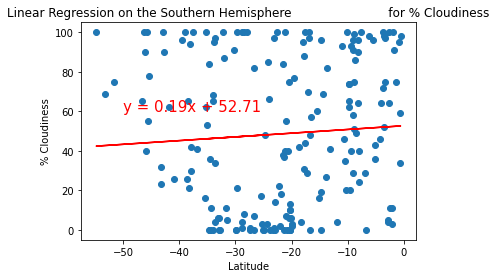

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

#### Finding
The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.06 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness.

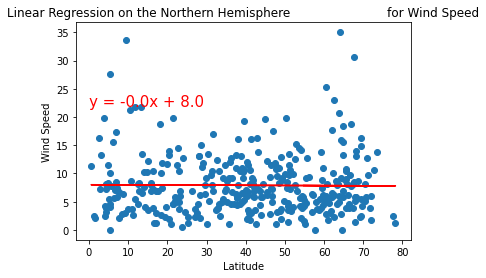

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,22))

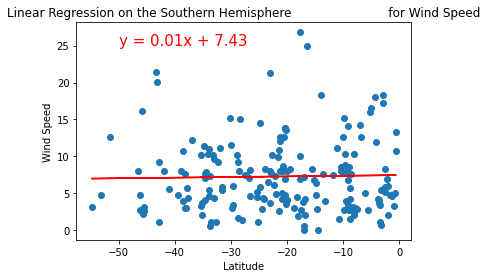

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

#### Finding
The correlation between the latitude and wind speed is almost non-existent because the r-value is very close to 0 for the Northern Hemisphere and the Southern Hemisphere. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed.

### Use Google API to Create Heatmaps